In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
df = pd.read_stata('hansen_dwi.dta')

(214558, 15)
   Unnamed: 0        Date  Alcohol1  Alcohol2  low_score  male  white  \
0           0  2007-07-30         0         0        0.0   1.0    1.0   
1           1  2007-02-20         0         0        0.0   1.0    1.0   
2           2  2003-03-18         0         0        0.0   1.0    0.0   
3           3  2006-12-17         0         0        0.0   1.0    1.0   
4           4  1999-04-07         0         0        0.0   1.0    1.0   

   recidivism  acc  aged    year  bac1  bac2  dui  agg_dui  
0         1.0  0.0  48.0  2007.0   0.0   0.0    0        0  
1         0.0  0.0  51.0  2007.0   0.0   0.0    0        0  
2         0.0  0.0  68.0  2003.0   0.0   0.0    0        0  
3         0.0  0.0  51.0  2006.0   0.0   0.0    0        0  
4         0.0  0.0  22.0  1999.0   0.0   0.0    0        0  


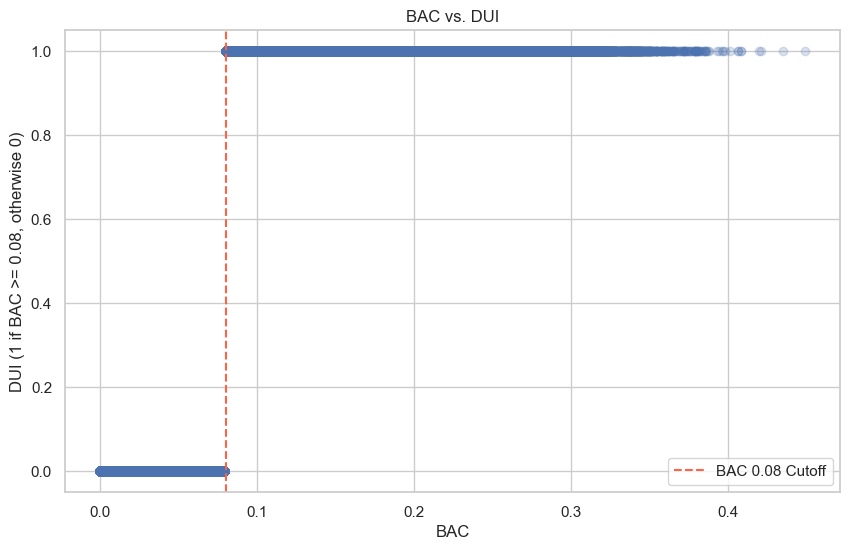

In [16]:
df['dui'] = (df['bac1'] >= 0.08).astype(int)
df['agg_dui'] = (df['bac1'] >= 0.15).astype(int)
print(df.shape)
print(df.head())
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(df['bac1'], df['dui'], alpha=0.2)
plt.axvline(x=0.08, linestyle='--', color='tomato', label='BAC 0.08 Cutoff')
plt.xlabel('BAC')
plt.ylabel('DUI (1 if BAC >= 0.08, otherwise 0)')
plt.title('BAC vs. DUI')
plt.legend()
plt.show()

df.to_csv('hansen_dwi.csv')

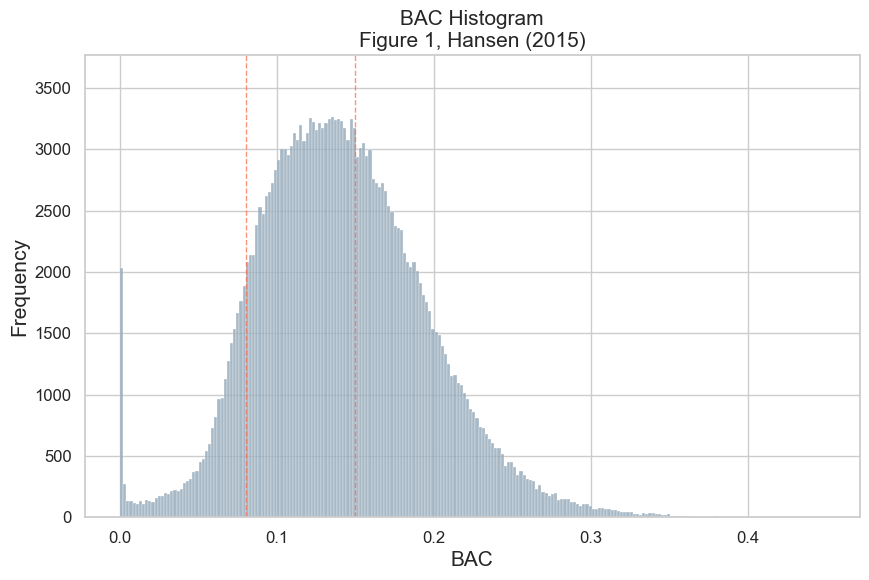

In [10]:
dwi = pd.read_csv('hansen_dwi.csv')

# Ensure seaborn's visual style is set
sns.set_theme(style="whitegrid")

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(dwi['bac1'], binwidth=0.002, color="#8aa1b4", kde=False)

# Add vertical lines at the specified x intercepts
plt.axvline(x=0.08, linewidth=1, linestyle='--', color='tomato', alpha=0.7)
plt.axvline(x=0.15, linewidth=1, linestyle='--', color='tomato', alpha=0.7)

# Set labels and title
plt.xlabel('BAC', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('BAC Histogram\nFigure 1, Hansen (2015)', fontsize=15)

# Adjust y-axis limits for additional space at the top
plt.ylim(0, plt.ylim()[1] * 1.1)

# Customize tick label font sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set background color
plt.gca().set_facecolor('white')
plt.grid(True)

# Display the plot
plt.show()


In [20]:
data = pd.read_csv('hansen_dwi.csv')

# Define the outcomes and predictors based on user's dataset structure
outcomes = ['male', 'white', 'aged', 'acc']
predictors = ['dui', 'agg_dui']

# Function to run linear regression and return coefficients and standard errors
def run_regression(data, outcome, predictor):
    formula = f"{outcome} ~ {predictor}"
    model = smf.ols(formula, data=data).fit()
    coef = model.params[predictor]
    se = model.bse[predictor]
    return coef, se

# Prepare to store results
results = []

# Compute the regression results for each outcome and predictor
for outcome in outcomes:
    dui_coef, dui_se = run_regression(data, outcome, 'dui')
    agg_dui_coef, agg_dui_se = run_regression(data, outcome, 'agg_dui')
    results.append({
        'Characteristic': outcome.capitalize(),
        'DUI Coef.': f"{dui_coef:.3f}",
        'DUI SE': f"({dui_se:.3f})",
        'Agg DUI Coef.': f"{agg_dui_coef:.3f}",
        'Agg DUI SE': f"({agg_dui_se:.3f})"
    })

# Convert results to a DataFrame for better display
results_df = pd.DataFrame(results)
results_df

,Characteristic,DUI Coef.,DUI SE,Agg DUI Coef.,Agg DUI SE
0,Male,0.004,(0.003),-0.005,(0.002)
1,White,0.020,(0.002),0.018,(0.002)
2,Aged,-0.632,(0.082),1.546,(0.050)
3,Acc,0.033,(0.003),0.086,(0.002)


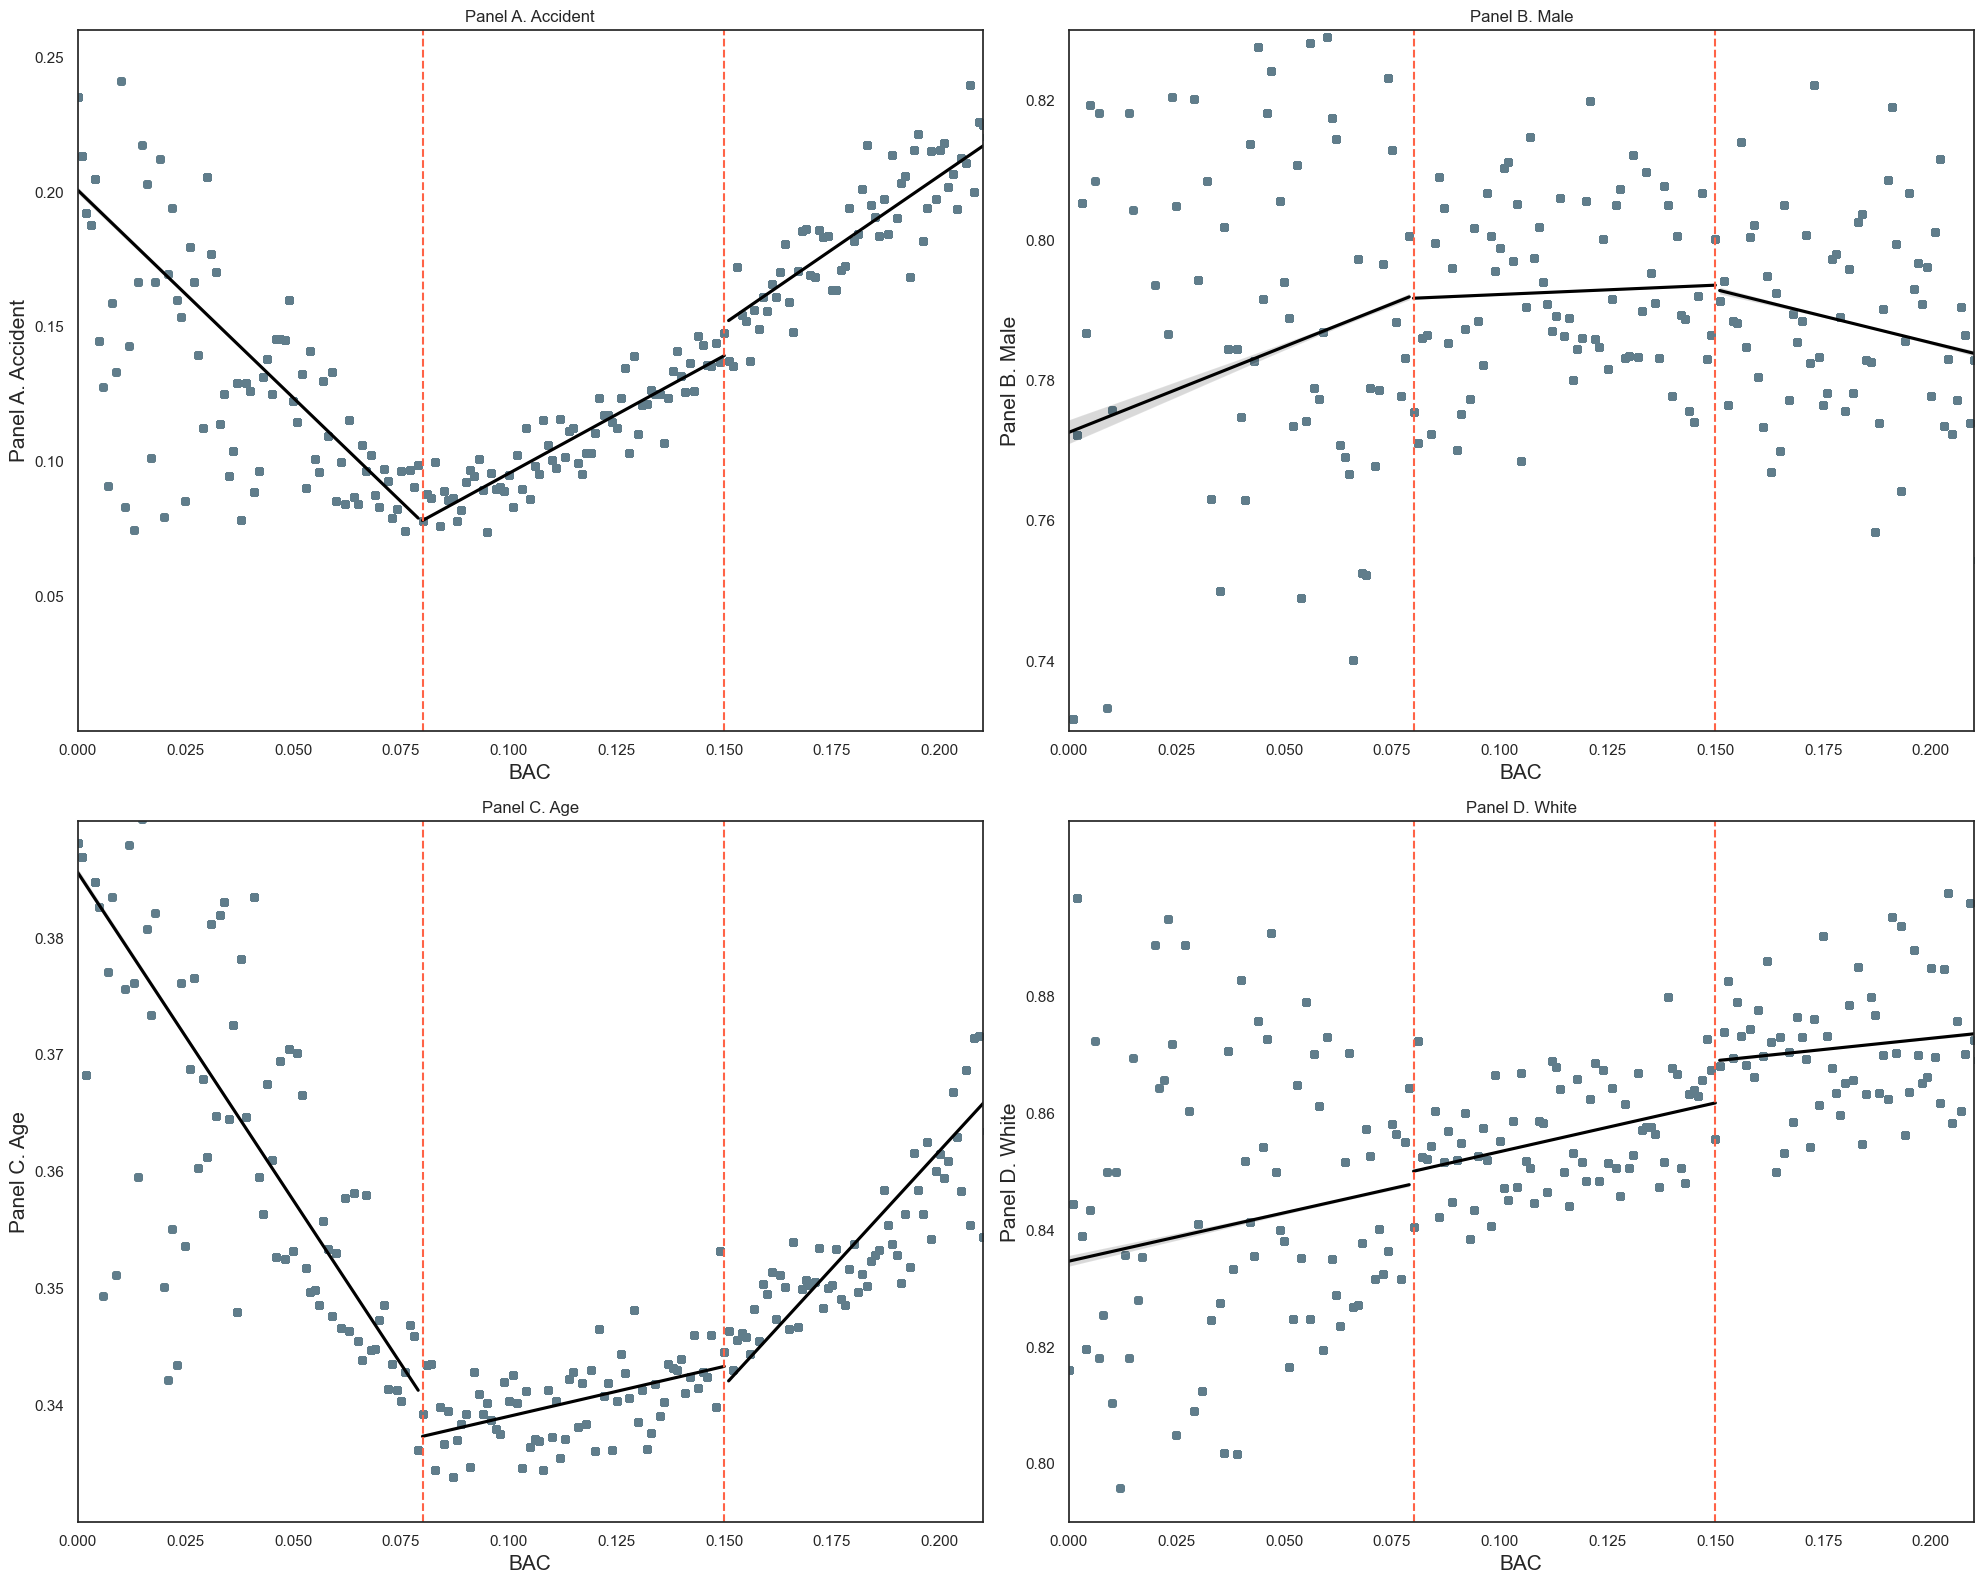

In [35]:
# Load your data
data = pd.read_csv('hansen_dwi.csv')

# Preprocess data for all plots
# Calculate averages and adjust DUI categories
characteristics = ['acc', 'male', 'aged', 'white']
for char in characteristics:
    data[f'avg_{char}'] = data.groupby('bac1')[char].transform(lambda x: x.mean() / 100 if char == 'aged' else x.mean())
data['dui_adjusted'] = np.where(data['bac1'] > 0.15, 2, data['dui'])

# Set up the plotting environment
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()
color_map = {0: "#607d8b", 1: "#607d8b", 2: "#607d8b"}

# Titles and y-limits for each subplot
titles = ['Panel A. Accident', 'Panel B. Male', 'Panel C. Age', 'Panel D. White']
ylimits = [(0, 0.26), (0.73, 0.83), (0.33, 0.39), (0.79, 0.91)]
yticks = [(0.05, 0.1, 0.15, 0.2, 0.25), (0.74, 0.76, 0.78, 0.8, 0.82), 
          (0.34, 0.35, 0.36, 0.37, 0.38), (0.80, 0.82, 0.84, 0.86, 0.88)]

for i, char in enumerate(characteristics):
    ax = axes[i]
    for dui_cat in data['dui_adjusted'].unique():
        subset = data[data['dui_adjusted'] == dui_cat]
        sns.scatterplot(x='bac1', y=f'avg_{char}', data=subset, alpha=0.3,
                        color=color_map[dui_cat], edgecolor=None, ax=ax)
        sns.regplot(x='bac1', y=f'avg_{char}', data=subset, scatter=False, 
                    line_kws={'color': 'black'}, ax=ax)
    
    # Add vertical lines for DUI thresholds
    ax.axvline(x=0.08, color='tomato', linestyle='--')
    ax.axvline(x=0.15, color='tomato', linestyle='--')

    # Set axis limits and ticks
    ax.set_xlim(0, 0.21)
    ax.set_ylim(*ylimits[i])
    ax.set_yticks(np.linspace(yticks[i][0], yticks[i][-1], num=5))  # Correctly unpack the range and number of ticks
    ax.set_xlabel('BAC', fontsize=15)
    ax.set_ylabel(titles[i], fontsize=15)
    ax.set_title(titles[i])

# Adjust subplot layout
plt.tight_layout()

# Remove all legends
for ax in axes:
    ax.legend([], [], frameon=False)

plt.show()
